# Sentiment Classification

# Problem Description:
Generate Word Embedding and retrieve outputs of each layer with Keras based 
on the Classification task.

Word embedding are a type of word representation that allows words with 
similar meaning to have a similar representation.
It is a distributed representation for the text that is perhaps one of the key 
breakthroughs for the impressive performance of deep learning methods on 
challenging natural language processing problems.
We will use the IMDb dataset to learn word embedding as we train our dataset. 
This dataset contains 25,000 movie reviews from IMDB, labeled with a sentiment 
(positive or negative).

# (1) Loading the dataset

In [151]:
from keras.datasets import imdb

Importing IMDB dataset from Keras library. IMDB dataset contains 50000 movies reviews from the Internet Movie Database. Half of the reviews are positive (1) and half are negative (0).

# (2) Train-Test Split

In [152]:
vocab_size=10000
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)

When the above code is run then following things happen:

(1)It downloads the data

(2)It downloads the first 10000 top words for each review

(3) It splits the data into a test and a training set

In [153]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [156]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


From the above we see that the text of the review has been encoded as a sequence of integers so thus the dataset has already been preprocessed, and each word has been replaced by an integer index. The reviews are thus represented as varying-length sequences of integers.A dictionary called the vocabulary links each word to a unique integer.Here 4 represents the 4th most used word, 5 the 5th most used word and so on.The integer 1 is reserved reserved for the start marker, the integer 2 for an unknown word and 0 for padding. 

# (3) Import the labels (train and test)

In [ ]:
print('y_train_labels :',y_train)
print('y_test_labels :',y_test)

y_train_labels : [1 0 0 ... 0 1 0]
y_test_labels : [0 1 1 ... 0 0 0]


Here 0 stands for negative review and 1 stand for positive review

# (4) Get the word index and then Create a key-value pair for word and word_id

In [ ]:
#A dictionary mapping words to an integer index
vocabulary = imdb.get_word_index()

In [155]:
vocabulary

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


The above is the indexes assigned to different words in 1st review.Now lets see what are the words corresponding to it for the first review from training dataset.

In [ ]:
word_and_index={i: word for word, i in vocabulary.items()}
review_words= [word_and_index.get(i, ' ') for i in x_train[0]]
print(review_words)

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'musicians', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 

In [ ]:
# The first indices are reserved
vocabulary = {k:(v+3) for k,v in vocabulary.items()} 
vocabulary["<PAD>"] = 0
# See how integer 1 appears first in the review above. 
vocabulary["<START>"] = 1
vocabulary["<UNK>"] = 2  # unknown
vocabulary["<UNUSED>"] = 3

# reversing the vocabulary. 
# in the index, the key is an integer, 
# and the value is the corresponding word.
index = dict([(value, key) for (key, value) in vocabulary.items()])

def decode_review(text):
    '''converts encoded text to human readable form.
    each integer in the text is looked up in the index, and 
    replaced by the corresponding word.
    '''
    return ' '.join([index.get(i, '?') for i in text])

In [ ]:
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

If we see each review,we will notice that reviews differ in terms of lengths.We need to have text samples of the same length in order to feed them into our neural network.To get a fixed length input, we can simply truncate the reviews to a fixed number of words, say 300.For reviews that have more than 300 words, we will keep only the first 300 words.If reviews are shorter than 300 words we will pad them with zeros.We can use keras processing library for that

In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen=300

In [ ]:
#make all sequences of the same length
x_train_pad = pad_sequences(x_train, maxlen=maxlen)
x_test_pad =  pad_sequences(x_test, maxlen=maxlen)
#x_train_pad = pad_sequences(x_train, maxlen=maxlen,padding='post')
#x_test_pad =  pad_sequences(x_test, maxlen=maxlen,padding='post')

In [ ]:
print('x_train_pad shape :',x_train_pad.shape)
print('x_test_pad shape :',x_test_pad.shape)

x_train_pad shape : (25000, 300)
x_test_pad shape : (25000, 300)


In [ ]:
x_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [ ]:
decode_review(x_train_pad[0])

"<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend

# (5)Build a Sequential Model using Keras for the Sentiment Classification task

A word embedding is a class of approaches for representing words and documents using a
dense vector representation. It is an improvement over more the traditional bag-of-word model
encoding schemes where large sparse vectors were used to represent each word or to score each
word within a vector to represent an entire vocabulary. These representations were sparse
because the vocabularies were vast and a given word or document would be represented by a
large vector comprised mostly of zero values.
Instead, in an embedding, words are represented by dense vectors where a vector represents
the projection of the word into a continuous vector space. The position of a word within the
vector space is learned from text and is based on the words that surround the word when it is
used. The position of a word in the learned vector space is referred to as its embedding.
Two popular examples of methods of learning word embeddings from text include:
 Word2Vec, GloVe.In addition to these carefully designed methods, a word embedding can be learned as part
of a deep learning model. This can be a slower approach, but tailors the model to a specic
training dataset.

Keras offers an Embedding layer that can be used for neural networks on text data. It requires
that the input data be integer encoded, so that each word is represented by a unique integer.The Embedding layer is initialized with random weights and will learn an embedding for all
of the words in the training dataset.The Embedding layer is defined as the first hidden layer of a network.


#### (i) Sequential model-Without RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Dropout
model_1=Sequential()
#Embedding layer
model_1.add(Embedding(input_dim=vocab_size,output_dim=32,input_length=maxlen))
model_1.add(Flatten())
#Fully connected layer
model_1.add(Dense(8,activation='relu'))
#Dropout for regularization
model_1.add(Dropout(0.5))
#Output layer
model_1.add(Dense(1,activation='sigmoid'))

We are using the Keras Sequential API which means we build the network up one layer at a time.

input dim: This is the size of the vocabulary in the text data.

output dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. 

input_length: Length of input sequences which is maxlen

The output of the Embedding layer is a 2D vector with
one embedding for each word in the input sequence of words (input document). If we wish to connect a Dense layer directly to an Embedding layer, we must first
flatten the 2D output matrix to a 1D vector using the Flatten layer. 

In [ ]:
#compile the model
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

Since we are going to have only the decision when the review is positive or negative we will use binary_crossentropy for the loss function. The optimizer is the standard one (adam) and the metrics are also the standard accuracy metric.

In [ ]:
history_1=model_1.fit(x_train_pad,y_train,epochs=5,batch_size=128,validation_data=(x_test_pad, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 2s 76us/step - loss: 0.6019 - acc: 0.6446 - val_loss: 0.3463 - val_acc: 0.8664
Epoch 2/5
25000/25000 [==============================] - 2s 69us/step - loss: 0.3129 - acc: 0.8670 - val_loss: 0.2925 - val_acc: 0.8750
Epoch 3/5
25000/25000 [==============================] - 2s 68us/step - loss: 0.2061 - acc: 0.9154 - val_loss: 0.2935 - val_acc: 0.8775
Epoch 4/5
25000/25000 [==============================] - 2s 68us/step - loss: 0.1386 - acc: 0.9420 - val_loss: 0.3308 - val_acc: 0.8722
Epoch 5/5
25000/25000 [==============================] - 2s 69us/step - loss: 0.0974 - acc: 0.9552 - val_loss: 0.3542 - val_acc: 0.8734


In [ ]:
model_1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 32)           320000    
_________________________________________________________________
flatten_7 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 76808     
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 9         
Total params: 396,817
Trainable params: 396,817
Non-trainable params: 0
_________________________________________________________________


From above we see that the embedding layer represents 320000 parameters. At first, these parameters are random, and the embedding is just meaningless. But during the training, these parameters are tuned and the network becomes more and more capable to extract the meaning of the words.

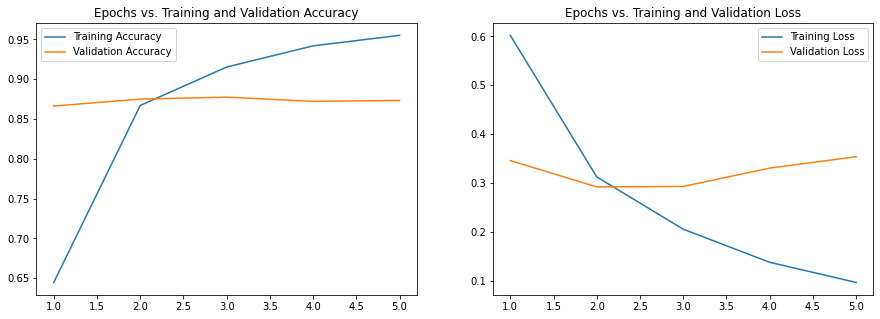

In [ ]:
import matplotlib.pyplot as plt

acc=history_1.history['acc']
val_acc=history_1.history['val_acc']
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']
epochs=range(1,len(acc)+1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(epochs,loss, label='Training Loss')
plt.plot(epochs,val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()



From above we can see that we got good accuracy but model suffers from overfitting

#### (ii) Sequential model with SimpleRNN

In [ ]:
from keras.layers import SimpleRNN
model_2=Sequential()
#Embedding layer
model_2.add(Embedding(input_dim=vocab_size,output_dim=32,input_length=maxlen))
#Recurrent layer
model_2.add(SimpleRNN(32))
#Fully connected layer
model_2.add(Dense(8,activation='relu'))
#Dropout for regularization
model_2.add(Dropout(0.5))
#output layer
model_2.add(Dense(1,activation='sigmoid'))


In [ ]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history_2=model_2.fit(x_train_pad,y_train,epochs=5,batch_size=128,validation_data=(x_test_pad, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 61s 2ms/step - loss: 0.6899 - acc: 0.5210 - val_loss: 0.6720 - val_acc: 0.6019
Epoch 2/5
25000/25000 [==============================] - 60s 2ms/step - loss: 0.5091 - acc: 0.7586 - val_loss: 0.4049 - val_acc: 0.8258
Epoch 3/5
25000/25000 [==============================] - 60s 2ms/step - loss: 0.3615 - acc: 0.8650 - val_loss: 0.3653 - val_acc: 0.8414
Epoch 4/5
25000/25000 [==============================] - 60s 2ms/step - loss: 0.3293 - acc: 0.8752 - val_loss: 0.4263 - val_acc: 0.8347
Epoch 5/5
25000/25000 [==============================] - 59s 2ms/step - loss: 0.2560 - acc: 0.9122 - val_loss: 0.4006 - val_acc: 0.8533


The simpleRNN isnt good at processing long sequences such as text.We could use other type of RNN such as LSTM which perform better.

In [ ]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 32)           320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 322,353
Trainable params: 322,353
Non-trainable params: 0
_________________________________________________________________


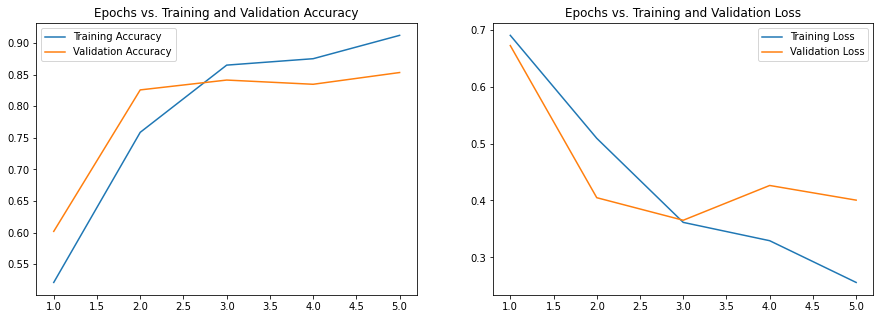

In [ ]:
import matplotlib.pyplot as plt

acc=history_2.history['acc']
val_acc=history_2.history['val_acc']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']
epochs=range(1,len(acc)+1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(epochs,loss, label='Training Loss')
plt.plot(epochs,val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

#### (iii) Sequential model with LSTM

In [ ]:
from keras.layers import LSTM
model_3=Sequential()
model_3.add(Embedding(input_dim=vocab_size,output_dim=32,input_length=maxlen))
model_3.add(LSTM(32))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(1,activation='sigmoid'))

In [ ]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history_3=model_3.fit(x_train_pad,y_train,epochs=5,batch_size=128,validation_data=(x_test_pad, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 160s 6ms/step - loss: 0.5315 - acc: 0.7171 - val_loss: 0.3064 - val_acc: 0.8717
Epoch 2/5
25000/25000 [==============================] - 159s 6ms/step - loss: 0.3197 - acc: 0.8819 - val_loss: 0.2923 - val_acc: 0.8748
Epoch 3/5
25000/25000 [==============================] - 160s 6ms/step - loss: 0.2520 - acc: 0.9147 - val_loss: 0.3153 - val_acc: 0.8686
Epoch 4/5
25000/25000 [==============================] - 160s 6ms/step - loss: 0.2055 - acc: 0.9315 - val_loss: 0.3422 - val_acc: 0.8702
Epoch 5/5
25000/25000 [==============================] - 160s 6ms/step - loss: 0.1756 - acc: 0.9429 - val_loss: 0.4173 - val_acc: 0.8660


In [ ]:
model_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 32)           320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 328,593
Trainable params: 328,593
Non-trainable params: 0
_________________________________________________________________


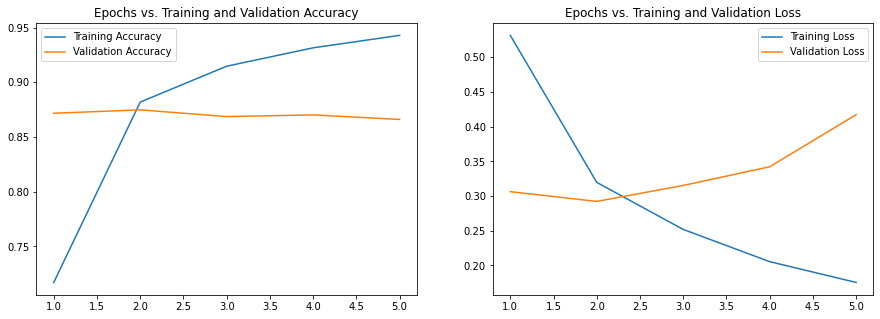

In [ ]:
import matplotlib.pyplot as plt

acc=history_3.history['acc']
val_acc=history_3.history['val_acc']
loss=history_3.history['loss']
val_loss=history_3.history['val_loss']
epochs=range(1,len(acc)+1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs,acc, label='Training Accuracy')
plt.plot(epochs,val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(epochs,loss, label='Training Loss')
plt.plot(epochs,val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

# (6)Report the Accuracy of the model

In [ ]:
result_1=model_1.evaluate(x_test_pad,y_test)
print('Model with Embedding and Classifier Test Accuracy:',result_1[1])
result_2=model_2.evaluate(x_test_pad,y_test)
print('Model with Embedding,SimpleRNN and Classifier Test Accuracy:',result_2[1])
result_3=model_3.evaluate(x_test_pad,y_test)
print('Model with Embedding,LSTM and Classifier Test Accuracy:',result_3[1])

25000/25000 [==============================] - 2s 63us/step
Model with Embedding and Classifier Test Accuracy: 0.8733999729156494
25000/25000 [==============================] - 20s 785us/step
Model with Embedding,SimpleRNN and Classifier Test Accuracy: 0.8533200025558472
25000/25000 [==============================] - 43s 2ms/step
Model with Embedding,LSTM and Classifier Test Accuracy: 0.8660399913787842


From the above we can see that Sequential model without RNN have highest accuracy than other model.

# (7)Retrieve the output of each layer in Keras for a given single test sample from the trained model you built

After training the model,we use layer.output to get the output Tensors for each layer. Then we call keras.backend.function(input_list, output_list) where input_list is the input to the model, obtained with Model.input, and output_list is the output Tensors of a layer of the model, obtained from the value of the previous layer.output attributes. The result of this is a new function that takes a 2 element list of where the first element is the training/testing data and the second element is 1. We than call this function to get the output values of each layer for the training/testing data, represented by a two-dimensional numpy.ndarray where each row represents a sample from the training/testing data and each column represents a single node of that layer.

In [ ]:
from keras import backend as K
outputs = []
for layer in model_1.layers:
    keras_function = K.function([model_1.input], [layer.output])
    outputs.append(keras_function([x_test_pad, 1]))
print(outputs)

[[array([[[-1.70526293e-03,  1.34597020e-03, -1.21442857e-03, ...,
          9.75656789e-03, -2.27610260e-04,  4.65503254e-05],
        [-1.70526293e-03,  1.34597020e-03, -1.21442857e-03, ...,
          9.75656789e-03, -2.27610260e-04,  4.65503254e-05],
        [-1.70526293e-03,  1.34597020e-03, -1.21442857e-03, ...,
          9.75656789e-03, -2.27610260e-04,  4.65503254e-05],
        ...,
        [-2.53173411e-02, -4.86653894e-02,  9.04948264e-03, ...,
         -2.95666000e-03,  9.19778179e-03, -1.26296775e-02],
        [-7.83450305e-02, -2.22986694e-02, -4.48869392e-02, ...,
         -1.32604856e-02, -1.13915307e-02, -8.97701830e-02],
        [ 2.68210806e-02,  3.75255570e-02, -2.11211722e-02, ...,
          5.20183444e-02, -6.81505129e-02, -7.26005509e-02]],

       [[-1.70526293e-03,  1.34597020e-03, -1.21442857e-03, ...,
          9.75656789e-03, -2.27610260e-04,  4.65503254e-05],
        [-1.70526293e-03,  1.34597020e-03, -1.21442857e-03, ...,
          9.75656789e-03, -2.2761026

In [ ]:
len(outputs)

5

# Conclusion :

(1)Sentiment analysis is the process of understanding an opinion about a subject written or spoken in a language.It is also referred as opinion mining or emotion AI

(2)Embedding is a way to extract the meaning of a word. In the embedding process, each word (or more precisely, each integer corresponding to a word) is translated to a vector in N-dimensional space.The Embeddinglayer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, it looks up
these integers in an internal dictionary, and it returns the associated vectors

(3) The parameters of the embedding layer are tuned in the context of a given task. Here, the task was to classify reviews as positive or negative, and words like "good" and "bad" end up in opposite regions of the parameter space.

(4)LSTM maintain states and are capable of learning the relationships between elements in an input sequence.LSTM helps overcome the problem of a vanishing gradient problem in recurrent neural network